In [63]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d_turbo'
run_name = 'et1'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [64]:
env_params = ut.read_params(data_dir+'param_env.txt')
for ep in env_params:
    print(ep, env_params[ep])
alg_params = ut.read_params(data_dir+'param_alg.txt')
for ep in alg_params:
    print(ep, alg_params[ep])

int_steps 0.001
ep_length 200.0
ep_length_eval 1000.0
decision_time 0.25
alphas [ 6.  8. 10. 12. 14. 16. 18. 20.]
CL_alphas [0.65 0.75 0.82 0.9  1.   1.08 1.1  1.05]
CD_alphas [0.05 0.07 0.09 0.1  0.13 0.18 0.18 0.21]
init_theta 0.7853981633974483
init_dtheta 0.0
init_alpha 7.0
beta_bins [-3.14159265 -2.6927937  -2.24399475 -1.7951958  -1.34639685 -0.8975979
 -0.44879895  0.          0.44879895  0.8975979   1.34639685  1.7951958
  2.24399475  2.6927937   3.14159265]
banks [-0.26179939 -0.20943951 -0.15707963 -0.10471976 -0.05235988  0.
  0.05235988  0.10471976  0.15707963  0.20943951  0.26179939]
init_bank 5.0
init_phi 0.0
init_dphi 0.0
wind_type turbo
wind_amplification 1.0
windv_file_dir ../data/kite3d_turbo/v/
windv_file_name velocities
windq_file_path ../data/kite3d_turbo/q.txt
start_frame 1000.0
alg_type et
lambda 0.9
gamma 1.0
n_steps 250000000.0
traj_points 200.0
eval_steps 20000.0
lr0 0.002
lrc 312500.0
lr_expn 0.8
lr_burn 166666666.66666666
eps0 0.005
epsc 1666666.6666666667
e

In [65]:
#q_traj, s_labels, a_labels = ut.read_2d_traj(data_dir+'/quality_traj.txt')
r_traj, head = ut.read_traj(data_dir+'/return_traj.txt')
i_traj, head = ut.read_traj(data_dir+'/info_traj.txt')

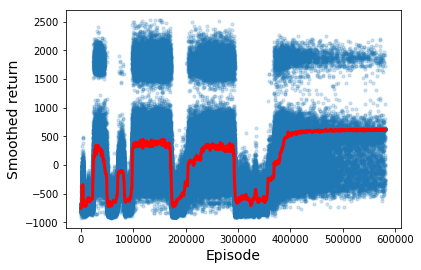

In [66]:
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)
#plt.ylim([-1000,3000])
x, y = ut.smooth_traj(r_traj[:,0], 1)
plt.scatter(x,y,s=10, alpha=0.2)
x, y = ut.smooth_traj(r_traj[:,0], 500)
plt.plot(x,y, color='red', lw=3)

#plt.savefig(plot_dir+'return.png', dpi=200)

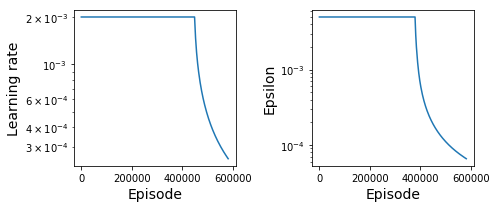

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))

ax1.set_xlabel('Episode', fontsize=14)
ax1.set_ylabel('Learning rate', fontsize=14)
ax1.set_yscale('log')
ax1.plot(i_traj[:,0], i_traj[:,1])

ax2.set_xlabel('Episode', fontsize=14)
ax2.set_ylabel('Epsilon', fontsize=14)
ax2.set_yscale('log')
ax2.plot(i_traj[:,0], i_traj[:,2])

plt.tight_layout()
#plt.savefig(plot_dir+'lr_eps.png', dpi=200)

### Quality trajectory for only attack angles

In [61]:
q_traj, s_labels, a_labels = ut.read_2d_traj(data_dir+'/quality_traj.txt')

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


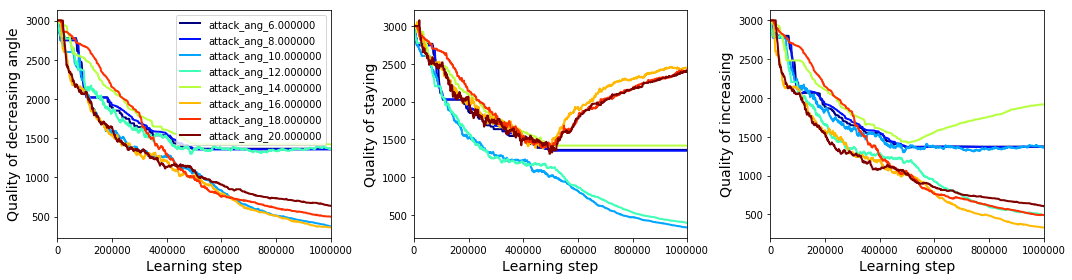

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
colors = plt.cm.jet(np.linspace(0,1,len(q_traj[0])))
states = range(0,len(q_traj[0]))

ax1.set_xlabel('Learning step', fontsize=14)
ax1.set_ylabel('Quality of decreasing angle', fontsize=14)
xs = np.linspace(0, alg_params['n_steps'] , alg_params['traj_points']+1 )
ax1.set_xlim([0,alg_params['n_steps']])
#ax1.set_ylim([-100,alg_params['init_values']])
for k in states:
    ax1.plot(xs, q_traj[:,k,0], c=colors[k], label=s_labels[k], lw=2)
ax1.legend()

ax2.set_xlabel('Learning step', fontsize=14)
ax2.set_ylabel('Quality of staying', fontsize=14)
ax2.set_xlim([0,alg_params['n_steps']])
#ax1.set_ylim([-100,alg_params['init_values']])
for k in states:
    ax2.plot(xs, q_traj[:,k,1], c=colors[k], label=s_labels[k], lw=2)

ax3.set_xlabel('Learning step', fontsize=14)
ax3.set_ylabel('Quality of increasing', fontsize=14)
ax3.set_xlim([0,alg_params['n_steps']])
#ax1.set_ylim([-100,alg_params['init_values']])
for k in states:
    ax3.plot(xs, q_traj[:,k,2], c=colors[k], label=s_labels[k], lw=2)
    
plt.tight_layout()
#plt.savefig(plot_dir+'qualities.png', dpi=200)

### Quality trajectory for attack angles and vrel angles

In [7]:
n_alphas=len(env_params['alphas'])
n_betas=len(env_params['beta_bins'])-1
alpha = n_alphas-1
betas = np.arange(n_betas)
colors = plt.cm.jet(np.linspace(0,1,len(betas)))

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
states = range(0,len(q_traj[0]))

ax1.set_xlabel('Learning step', fontsize=14)
ax1.set_ylabel('Quality of decreasing angle', fontsize=14)
xs = np.linspace(0, alg_params['n_steps'] , alg_params['traj_points'] )
ax1.set_xlim([0,alg_params['n_steps']])
#ax1.set_ylim([-100,alg_params['init_values']])
count=0
for b in betas:
    index = b+alpha*n_betas
    ax1.plot(xs, q_traj[:,index,0], label=str(index) + " " + s_labels[index], c=colors[count])
    count+=1
#ax1.legend()

ax2.set_xlabel('Learning step', fontsize=14)
ax2.set_ylabel('Quality of staying', fontsize=14)
ax2.set_xlim([0,alg_params['n_steps']])
#ax1.set_ylim([-100,alg_params['init_values']])
count=0
for b in betas:
    index = b+alpha*n_betas
    ax2.plot(xs, q_traj[:,index,1], label=s_labels[index], c=colors[count])
    count+=1

ax3.set_xlabel('Learning step', fontsize=14)
ax3.set_ylabel('Quality of increasing', fontsize=14)
ax3.set_xlim([0,alg_params['n_steps']])
#ax1.set_ylim([-100,alg_params['init_values']])
count=0
for b in betas:
    index = b+alpha*n_betas
    ax3.plot(xs, q_traj[:,index,2], label=s_labels[index], c=colors[count])
    count+=1
    
plt.tight_layout()

KeyError: 'beta_bins'

### Quality trajectory for attack angles, bank and vrel angles

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


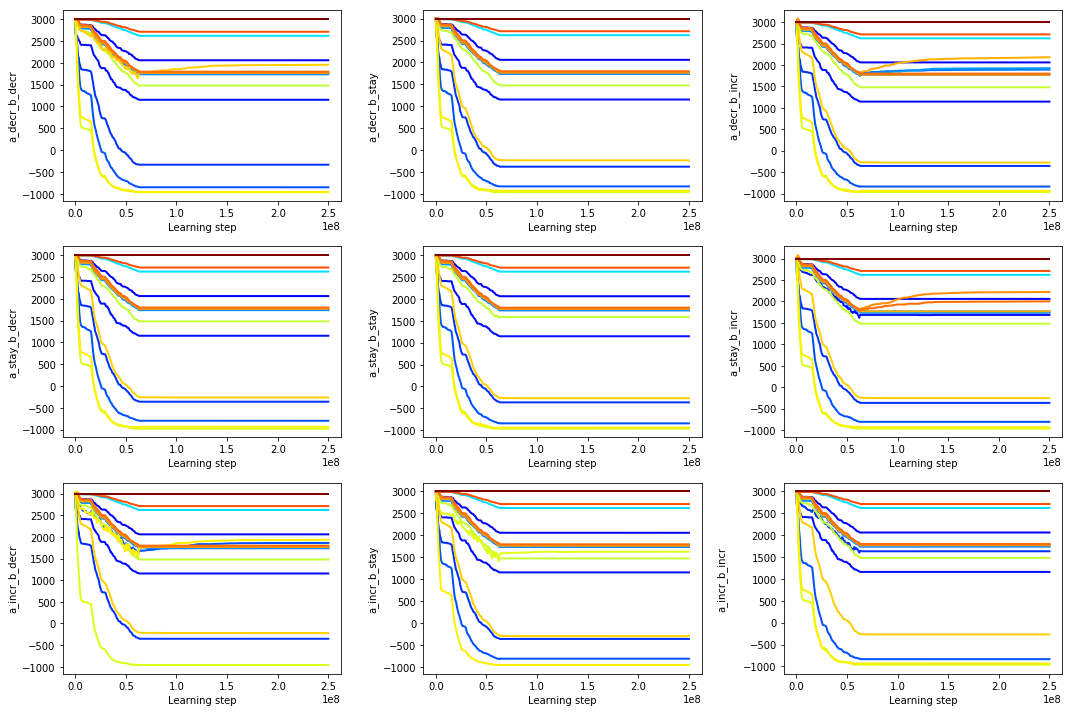

In [10]:
fig, axs = plt.subplots(3,3, figsize=(15,10))
n_traj = 30
colors = plt.cm.jet(np.linspace(0,1,n_traj))
xs = np.linspace(0, alg_params['n_steps'] , alg_params['traj_points'] )

for a_ind in range(3):
    for b_ind in range(3):
        pl_ind = b_ind + 3*a_ind
        axs[a_ind][b_ind].set_xlabel('Learning step')
        axs[a_ind][b_ind].set_ylabel(a_labels[pl_ind])
        #ax1.set_xlim([0,alg_params['n_steps']])
        #ax1.set_ylim([-100,alg_params['init_values']])
        count=0
        for index in range(n_traj):
            axs[a_ind][b_ind].plot(xs, q_traj[:,count,pl_ind], label=s_labels[count], c=colors[count], lw=2)
            count += 1
#plt.legend()
plt.tight_layout()
plt.savefig(plot_dir+'qualities.png', dpi=200)